In [34]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
df = pd.read_excel('Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [37]:
df.columns.values
#df.isnull().values.any()

array([u'Cement (component 1)(kg in a m^3 mixture)',
       u'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       u'Fly Ash (component 3)(kg in a m^3 mixture)',
       u'Water  (component 4)(kg in a m^3 mixture)',
       u'Superplasticizer (component 5)(kg in a m^3 mixture)',
       u'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       u'Fine Aggregate (component 7)(kg in a m^3 mixture)', u'Age (day)',
       u'Concrete compressive strength(MPa, megapascals) '], dtype=object)

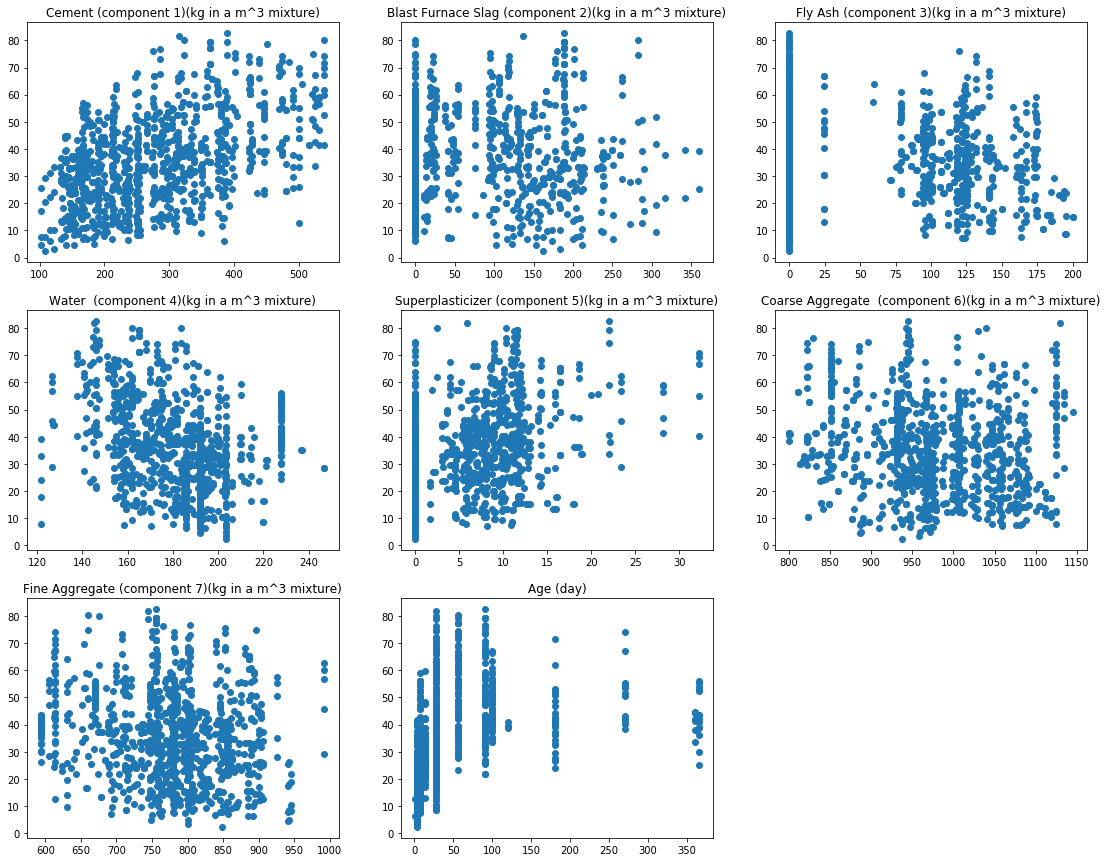

In [38]:
#checked whether data is linear of not
number_of_columns = 8
number_of_rows = 2
plt.figure(figsize=(19,15))
for col in range(0,8,1):
    plt.subplot(3,3,col+1)
    plt.title(df.columns[col])
    plt.scatter(df.iloc[:,col], df.iloc[:,-1])
plt.show();
    

In [39]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

print (mean_squared_error(y,y_pred))
print (mean_absolute_error(y,y_pred))
print (r2_score(y,y_pred))

107.211802735
8.21489939283
0.615464734269


In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1], test_size=0.2)
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
y_pred = lr.predict(Xtest)
print (mean_squared_error(ytest,y_pred))
print (mean_absolute_error(ytest,y_pred))
print (r2_score(ytest,y_pred))

118.103455221
8.35613100473
0.572202342811


In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso

pfp = make_pipeline(PolynomialFeatures(degree = 3), Lasso(alpha=0.001))
pfp.fit(Xtrain, ytrain)
y_pred = pfp.predict(Xtest)
print mean_squared_error(ytest,y_pred)
print mean_absolute_error(ytest,y_pred)
print r2_score(ytest,y_pred)

35.4907482425
4.50777859158
0.871444413531
